In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
pwd

'/content'

In [ ]:
cd gdrive/My\ Drive

/content/gdrive/My Drive


In [ ]:
pwd

'/content/gdrive/My Drive'

In [ ]:
cd BigData_CS5542/

/content/gdrive/My Drive/BigData_CS5542


In [ ]:
ls

Data.csv


In [ ]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./Data.csv')

In [ ]:
df.shape

(569, 33)

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
##describing data
print(df.columns.values)

['id' 'diagnosis' 'radius_mean' 'texture_mean' 'perimeter_mean'
 'area_mean' 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst'
 'Unnamed: 32']


**Data Cleaning**

Identify the null values if any and replace with zeros

In [ ]:
# Remove if any null values if any
modifiedDF=df.fillna(" ")

In [ ]:
# verify no longer null values presented in the data
modifiedDF.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
Unnamed: 32                0
dtype: int64

**1. Correlation**






In [ ]:
corr = df.corr()


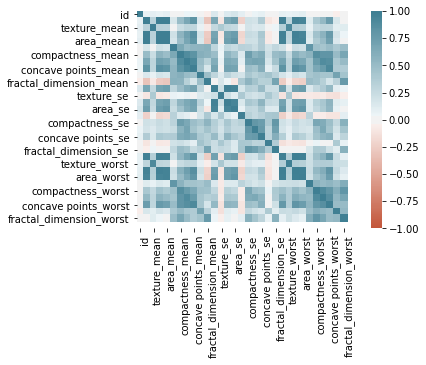

In [ ]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=500),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='left'
);

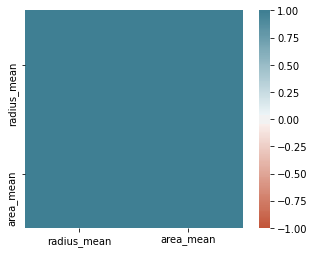

In [ ]:
## since radius and area are proportion relation.
df_modified=df[['radius_mean', 'area_mean']].groupby(['radius_mean'], as_index=False).mean().sort_values(by='area_mean', ascending=False) 
corr = df_modified.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=500),
    square=True
)

In [ ]:
##Analyze by pivoting features ---> with differnt featuers 
df_modified=df[['radius_mean', 'area_mean']].groupby(['radius_mean'], as_index=False).mean().sort_values(by='area_mean', ascending=False)
df_modified=df[['perimeter_mean', 'area_mean']].groupby(['perimeter_mean'], as_index=False).mean().sort_values(by='area_mean', ascending=False)
df_modified=df[['symmetry_se', 'area_mean']].groupby(['symmetry_se'], as_index=False).mean().sort_values(by='area_mean', ascending=False)
df_modified=df[['compactness_se', 'area_mean']].groupby(['compactness_se'], as_index=False).mean().sort_values(by='area_mean', ascending=False)


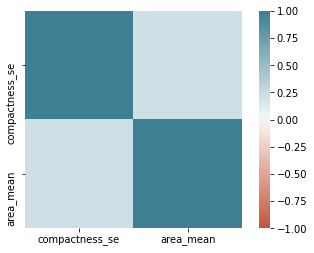

In [ ]:
corr = df_modified.corr()
#ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=500), square=True)


In [ ]:
# Remove if any null values if any
modifiedDF=df.fillna(" ")

In [ ]:
# verify no longer null values presented in the data
modifiedDF.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
Unnamed: 32                0
dtype: int64

**2. Regression**

In [ ]:
#Regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# generate random data-set
y = 2 + 3 * modifiedDF['radius_mean'] 
# generate no.of.ranadom values as same as dataset 
x = np.random.rand(569, 1)

In [ ]:
# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

In [ ]:
# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [-2.90705267]
Intercept: 45.84160267469071
Root mean squared error:  110.8601973922501
R2 score:  0.006396220553213872


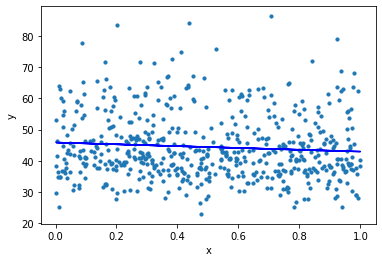

In [ ]:
# data points
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='b')
plt.show()


**Conclusion**

From the below scatter plot, linear regression model not predicting the data linearly with respect to an input column radius_mean. It means there is no proportionate relation between predicted value (dependent variable) and input value(independent variable).

**3. Mean,Standard Deviation, Sum and Count**

In [ ]:
mean1 = modifiedDF['radius_mean'].mean()
std_dev1 = modifiedDF[['radius_mean']].std()
groupby_sum1 = df.groupby(['radius_mean']).sum() 
groupby_count1 = df.groupby(['radius_mean']).count()

In [ ]:
print("mean=",mean1)
print("standard_devation=",std_dev1)
print("sum of the group with respect to radius_mean",groupby_sum1)
print("count of the group with respect to radius_mean",groupby_sum1)

mean= 14.127291739894563
standard_devation= radius_mean    3.524049
dtype: float64
sum of the group with respect to radius_mean                     id  texture_mean  ...  fractal_dimension_worst  Unnamed: 32
radius_mean                           ...                                      
6.981           862722         13.43  ...                  0.09382          0.0
7.691           921362         25.44  ...                  0.10660          0.0
7.729           921092         25.49  ...                  0.09938          0.0
7.760            92751         24.54  ...                  0.07039          0.0
8.196         85713702         16.84  ...                  0.07409          0.0
...                ...           ...  ...                      ...          ...
25.220         8611555         24.91  ...                  0.10510          0.0
25.730          899987         17.46  ...                  0.08815          0.0
27.220          873592         21.87  ...                  0.08082      